In [17]:
#Implementation of RNN(LSTM)

In [1]:
# import libraries
import tensorflow as tf
print(tf.__version__)
from sklearn import datasets
from sklearn import preprocessing
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
from platform import python_version

2.8.0


In [2]:
df = pd.read_csv("_eir_dataset/thesis_data.csv")

In [3]:
print(df.head(5),"\n")

           Datetime   AG_MW      REGION
0  16-02-2022 00:00  4959.0  All Island
1  16-02-2022 00:15  4984.0  All Island
2  16-02-2022 00:30  5063.0  All Island
3  16-02-2022 00:45  5068.0  All Island
4  16-02-2022 01:00  5014.0  All Island 



In [4]:
# dropping the third column
df.drop(df.columns[2],axis=1,inplace=True)

In [5]:
print(df.head(5))

           Datetime   AG_MW
0  16-02-2022 00:00  4959.0
1  16-02-2022 00:15  4984.0
2  16-02-2022 00:30  5063.0
3  16-02-2022 00:45  5068.0
4  16-02-2022 01:00  5014.0


<AxesSubplot:>

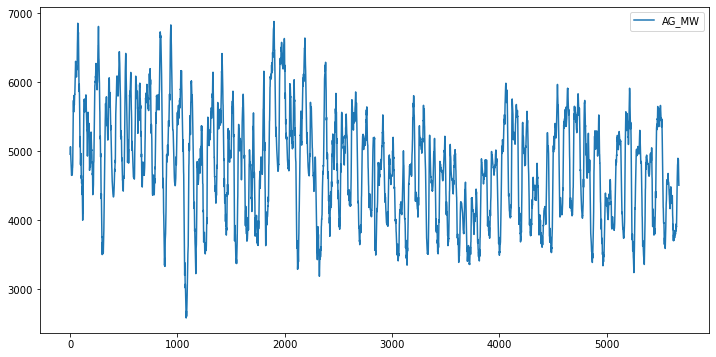

In [6]:
df.plot(figsize=(12,6))

In [7]:
df = df.set_index('Datetime')

In [8]:
print(df.head(5))

                   AG_MW
Datetime                
16-02-2022 00:00  4959.0
16-02-2022 00:15  4984.0
16-02-2022 00:30  5063.0
16-02-2022 00:45  5068.0
16-02-2022 01:00  5014.0


In [9]:
df.isnull().sum()

AG_MW    4
dtype: int64

In [10]:
df.fillna(method ='pad',inplace=True)

In [11]:
df.isnull().sum()

AG_MW    0
dtype: int64

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# results = seasonal_decompose(df['AG_MW'])
# result.plot()

# result = seasonal_decompose(df['AG_MW'], model='additive')

In [13]:
len(df)

5672

In [31]:
train_data = df.iloc[:5624]
test_data = df.iloc[5624:]

In [32]:
print(df.head())
print(df.tail())

                   AG_MW
Datetime                
16-02-2022 00:00  4959.0
16-02-2022 00:15  4984.0
16-02-2022 00:30  5063.0
16-02-2022 00:45  5068.0
16-02-2022 01:00  5014.0
                   AG_MW
Datetime                
16-04-2022 11:30  4842.0
16-04-2022 11:45  4727.0
16-04-2022 12:00  4641.0
16-04-2022 12:15  4568.0
16-04-2022 12:30  4509.0


In [33]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
scaler.fit(train_data)
scaled_training_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [35]:
scaled_training_data[:5]

array([[0.55232558],
       [0.55813953],
       [0.57651163],
       [0.57767442],
       [0.56511628]])

In [36]:
from keras.preprocessing.sequence import TimeseriesGenerator

# Defining Generator

# n_input 4 means it is for 1 hours as the data is of 15 minutes

In [37]:
n_input = 4
n_features = 1

generator = TimeseriesGenerator(scaled_training_data, scaled_training_data, length=n_input, batch_size=1)

In [38]:
print(type(generator))

X, y = generator[0]


print(f'given the Array = : {X.flatten()}')
print(f'Predict the y = : {y}')

<class 'keras.preprocessing.sequence.TimeseriesGenerator'>
given the Array = : [0.55232558 0.55813953 0.57651163 0.57767442]
Predict the y = : [[0.56511628]]


In [39]:
print(X.shape)

(1, 4, 1)


# n_input 48 means it is for 12 hours as the data is of 15 minutes

In [40]:
# let us check this for 12 hours

n_input = 48

generator = TimeseriesGenerator(scaled_training_data, scaled_training_data, length=n_input, batch_size=1)
# generator = TimeseriesGenerator(train_data, train_data, length=n_input, batch_size=1)

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Model_1_1

Optimiser = ADAM, 
Loss = MSE, 
Dense Layers = 1, 
DropOut = No, 
Epochs = 10, 
Time Band = 12 hours

In [86]:
# Defining the model
model = Sequential()

model.add(LSTM(100, activation = 'tanh', input_shape=(n_input, n_features)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit_generator(generator, epochs=10)

Epoch 1/10


<ipython-input-88-6989933669b3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10)


1106/1106 [==============================] - 30s 25ms/step - loss: 0.0068
Epoch 2/10
1106/1106 [==============================] - 31s 28ms/step - loss: 0.0015
Epoch 3/10
1106/1106 [==============================] - 34s 31ms/step - loss: 0.0011
Epoch 4/10
1106/1106 [==============================] - 42s 38ms/step - loss: 8.2190e-04
Epoch 5/10
1106/1106 [==============================] - 33s 30ms/step - loss: 7.4120e-04
Epoch 6/10
1106/1106 [==============================] - 36s 32ms/step - loss: 5.7521e-04
Epoch 7/10
1106/1106 [==============================] - 37s 34ms/step - loss: 5.1657e-04
Epoch 8/10
1106/1106 [==============================] - 38s 34ms/step - loss: 4.0617e-04
Epoch 9/10
1106/1106 [==============================] - 34s 31ms/step - loss: 3.6837e-04
Epoch 10/10
1106/1106 [==============================] - 34s 31ms/step - loss: 3.5221e-04


In [45]:
model.save("Base_Model_1_1/")

INFO:tensorflow:Assets written to: Base_Model_1_1/assets


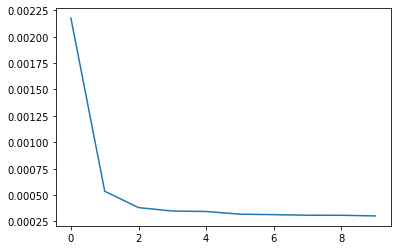

In [46]:
loss_each_epochs = model.history.history['loss']
plt.plot(range(len(loss_each_epochs)), loss_each_epochs)

In [47]:
last_trained_batch = scaled_training_data[-48:]

In [48]:
print(scaled_training_data.shape)

(5624, 1)


In [49]:
last_trained_batch = last_trained_batch.reshape((1, n_input, n_features))
print(n_input)
print(n_features)

48
1


In [50]:
model.predict(last_trained_batch)

array([[0.2657559]], dtype=float32)

In [51]:
scaled_test_data[0]

array([0.26116279])

In [52]:
print(len(test_data))

48


In [53]:
print(n_input)

48


In [54]:
test_predictions = []

first_eval_batch = scaled_training_data[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

# print(len(current_batch))

for i in range(len(test_data)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [55]:
test_predictions

[array([0.2657559], dtype=float32),
 array([0.2693653], dtype=float32),
 array([0.27781594], dtype=float32),
 array([0.28465164], dtype=float32),
 array([0.29169893], dtype=float32),
 array([0.3011169], dtype=float32),
 array([0.3125362], dtype=float32),
 array([0.32518673], dtype=float32),
 array([0.3390453], dtype=float32),
 array([0.35430133], dtype=float32),
 array([0.37093037], dtype=float32),
 array([0.38881713], dtype=float32),
 array([0.40790594], dtype=float32),
 array([0.42787468], dtype=float32),
 array([0.44800764], dtype=float32),
 array([0.46867964], dtype=float32),
 array([0.48975688], dtype=float32),
 array([0.51108974], dtype=float32),
 array([0.5327033], dtype=float32),
 array([0.5546201], dtype=float32),
 array([0.57680833], dtype=float32),
 array([0.5992423], dtype=float32),
 array([0.6219184], dtype=float32),
 array([0.6448328], dtype=float32),
 array([0.66797644], dtype=float32),
 array([0.6913419], dtype=float32),
 array([0.7149237], dtype=float32),
 array([0.738

In [56]:
# current_batch

In [57]:
test_data.head()

,AG_MW
Datetime,
16-04-2022 00:45,3707.0
16-04-2022 01:00,3730.0
16-04-2022 01:15,3785.0
16-04-2022 01:30,3782.0
16-04-2022 01:45,3806.0


In [58]:
true_predictions = scaler.inverse_transform(test_predictions)

In [59]:
test_data['Predictions'] = true_predictions

<ipython-input-59-01f68d514286>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = true_predictions


In [60]:
test_data.head(100)

,AG_MW,Predictions
Datetime,,
16-04-2022 00:45,3707.0,3726.750335
16-04-2022 01:00,3730.0,3742.270836
16-04-2022 01:15,3785.0,3778.608533
16-04-2022 01:30,3782.0,3808.002039
16-04-2022 01:45,3806.0,3838.305410
16-04-2022 02:00,3775.0,3878.802728
16-04-2022 02:15,3811.0,3927.905702
16-04-2022 02:30,3746.0,3982.302937
16-04-2022 02:45,3753.0,4041.894731


<AxesSubplot:xlabel='Datetime'>

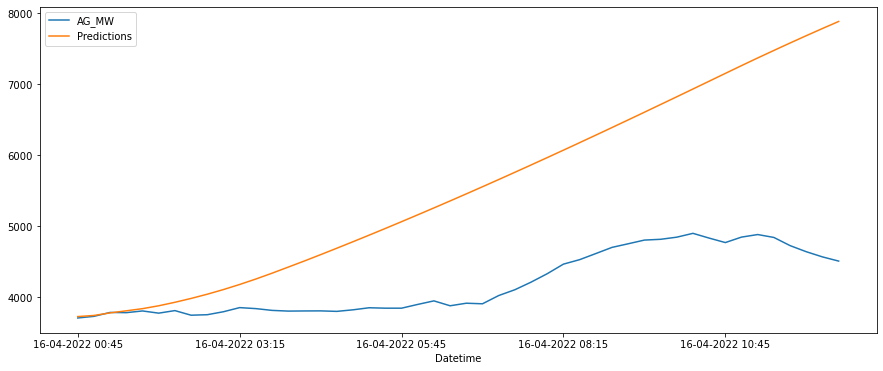

In [61]:
test_data.plot(figsize=(15,6))

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = sqrt(mean_squared_error(test_data['AG_MW'], test_data['Predictions']))

In [63]:
print(mse)

1626.116499506423



# Model_1_2

Optimiser = ADAM, 
Loss = MSE, 
Dense Layers = 2, 
DropOut = Yes, 
Epochs = 10, 
batch size = 5
Time Band = 24 hours
activation = relu for all the layers

In [64]:
# let us check this for 24 hours

n_input = 96
n_features = 1
generator = TimeseriesGenerator(scaled_training_data, scaled_training_data, length=n_input, batch_size=5)
# generator = TimeseriesGenerator(train_data, train_data, length=n_input, batch_size=1)

In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [89]:
# Defining the model
model = Sequential()

model.add(LSTM(100, activation = 'relu', input_shape=(n_input, n_features)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')

In [90]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               40800     
                                                                 
 dense_7 (Dense)             (None, 64)                6464      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 55,713
Trainable params: 55,713
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit_generator(generator, epochs=10)

Epoch 1/10


<ipython-input-91-6989933669b3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10)


1106/1106 [==============================] - 57s 49ms/step - loss: 0.0066
Epoch 2/10
1106/1106 [==============================] - 52s 47ms/step - loss: 8.7058e-04
Epoch 3/10
1106/1106 [==============================] - 51s 47ms/step - loss: 7.0440e-04
Epoch 4/10
1106/1106 [==============================] - 51s 46ms/step - loss: 6.1908e-04
Epoch 5/10
1106/1106 [==============================] - 52s 47ms/step - loss: 5.3557e-04
Epoch 6/10
1106/1106 [==============================] - 52s 47ms/step - loss: 4.8696e-04
Epoch 7/10
1106/1106 [==============================] - 52s 47ms/step - loss: 4.7287e-04
Epoch 8/10
1106/1106 [==============================] - 52s 47ms/step - loss: 4.3121e-04
Epoch 9/10
1106/1106 [==============================] - 52s 47ms/step - loss: 4.2952e-04
Epoch 10/10
1106/1106 [==============================] - 51s 46ms/step - loss: 4.0367e-04


In [69]:
model.save("Base_Model_1_2/")

INFO:tensorflow:Assets written to: Base_Model_1_2/assets


INFO:tensorflow:Assets written to: Base_Model_1_2/assets


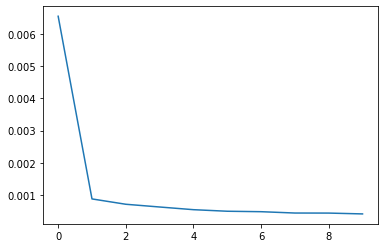

In [92]:
loss_each_epochs = model.history.history['loss']
plt.plot(range(len(loss_each_epochs)), loss_each_epochs)

In [93]:
last_trained_batch = scaled_training_data[-96:]

In [94]:
print(scaled_training_data.shape)

(5624, 1)


In [95]:
last_trained_batch = last_trained_batch.reshape((1, n_input, n_features))
# print(n_input)
# print(n_features)

In [96]:
model.predict(last_trained_batch)

array([[0.26824152]], dtype=float32)

In [97]:
scaled_test_data[0]

array([0.26116279])

In [98]:
print(len(test_data))

48


In [99]:
print(n_input)

96


In [100]:
test_predictions

[array([0.2657559], dtype=float32),
 array([0.2693653], dtype=float32),
 array([0.27781594], dtype=float32),
 array([0.28465164], dtype=float32),
 array([0.29169893], dtype=float32),
 array([0.3011169], dtype=float32),
 array([0.3125362], dtype=float32),
 array([0.32518673], dtype=float32),
 array([0.3390453], dtype=float32),
 array([0.35430133], dtype=float32),
 array([0.37093037], dtype=float32),
 array([0.38881713], dtype=float32),
 array([0.40790594], dtype=float32),
 array([0.42787468], dtype=float32),
 array([0.44800764], dtype=float32),
 array([0.46867964], dtype=float32),
 array([0.48975688], dtype=float32),
 array([0.51108974], dtype=float32),
 array([0.5327033], dtype=float32),
 array([0.5546201], dtype=float32),
 array([0.57680833], dtype=float32),
 array([0.5992423], dtype=float32),
 array([0.6219184], dtype=float32),
 array([0.6448328], dtype=float32),
 array([0.66797644], dtype=float32),
 array([0.6913419], dtype=float32),
 array([0.7149237], dtype=float32),
 array([0.738

In [101]:
# current_batch
test_data.head()

,AG_MW,Predictions
Datetime,,
16-04-2022 00:45,3707.0,3726.750335
16-04-2022 01:00,3730.0,3742.270836
16-04-2022 01:15,3785.0,3778.608533
16-04-2022 01:30,3782.0,3808.002039
16-04-2022 01:45,3806.0,3838.305410


In [102]:
true_predictions = scaler.inverse_transform(test_predictions)

In [103]:
test_data['Predictions'] = true_predictions

<ipython-input-103-01f68d514286>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = true_predictions


In [104]:
test_data.head(100)

,AG_MW,Predictions
Datetime,,
16-04-2022 00:45,3707.0,3726.750335
16-04-2022 01:00,3730.0,3742.270836
16-04-2022 01:15,3785.0,3778.608533
16-04-2022 01:30,3782.0,3808.002039
16-04-2022 01:45,3806.0,3838.305410
16-04-2022 02:00,3775.0,3878.802728
16-04-2022 02:15,3811.0,3927.905702
16-04-2022 02:30,3746.0,3982.302937
16-04-2022 02:45,3753.0,4041.894731


<AxesSubplot:xlabel='Datetime'>

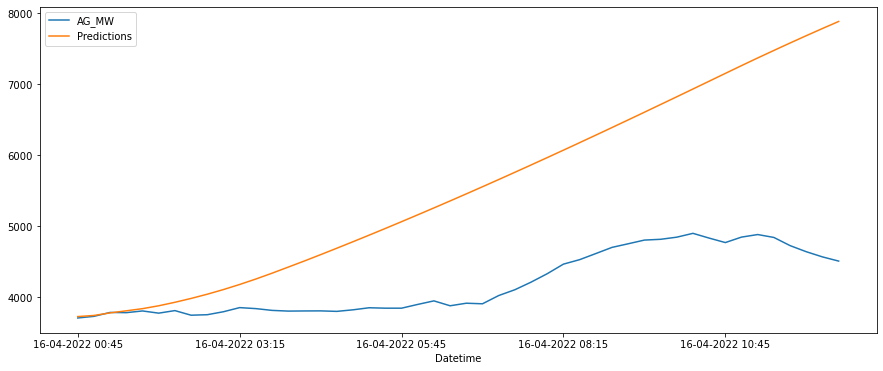

In [105]:
test_data.plot(figsize=(15,6))

In [106]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = sqrt(mean_squared_error(test_data['AG_MW'], test_data['Predictions']))

In [107]:
print(mse)

1626.116499506423


In [108]:
print("Mean Square Error", mse)

Mean Square Error 1626.116499506423
